# Data Encoding

Below are notes from each section of the qiskit course documentation found on this page: https://learn.qiskit.org/course/machine-learning/data-encoding

## Introduction

In ML, we always need to figure out how to represent our data numerically (whether its a time series or an image or text). This is also true in QML but we also need to figure out how to do this efficiently for a quantum system. This process is called data encoding or data embedding or loading.

## Methods

Let's consider a classical dataset X consisting of M samples, each with N features. Mathematically,

$X = \{x^{(1)}, ..., x^{(m)}, ..., x^{(M)}\}$

### Basis encoding

One way to encode our data is to associate an N-bit string with the computational basis state of an N-qubit system. For x=5, we have 0101 and quantum state $\ket{0101}$. In this case, thhe N-bit string representation is our datapoint consisting of N features. Then, we can represent the _entire dataset_ as a superposition of each computational basis state for each datapoint. In other words, if we have the 2 datapoint 11 and 00, we would create the bell state of $\frac{1}{\sqrt{2}}(\ket{00} + \ket{11})$ to represent both datapoints at once.

$\ket{X} = \frac{1}{\sqrt{M}}\displaystyle\sum_{m=1}^M \ket{x^m}$

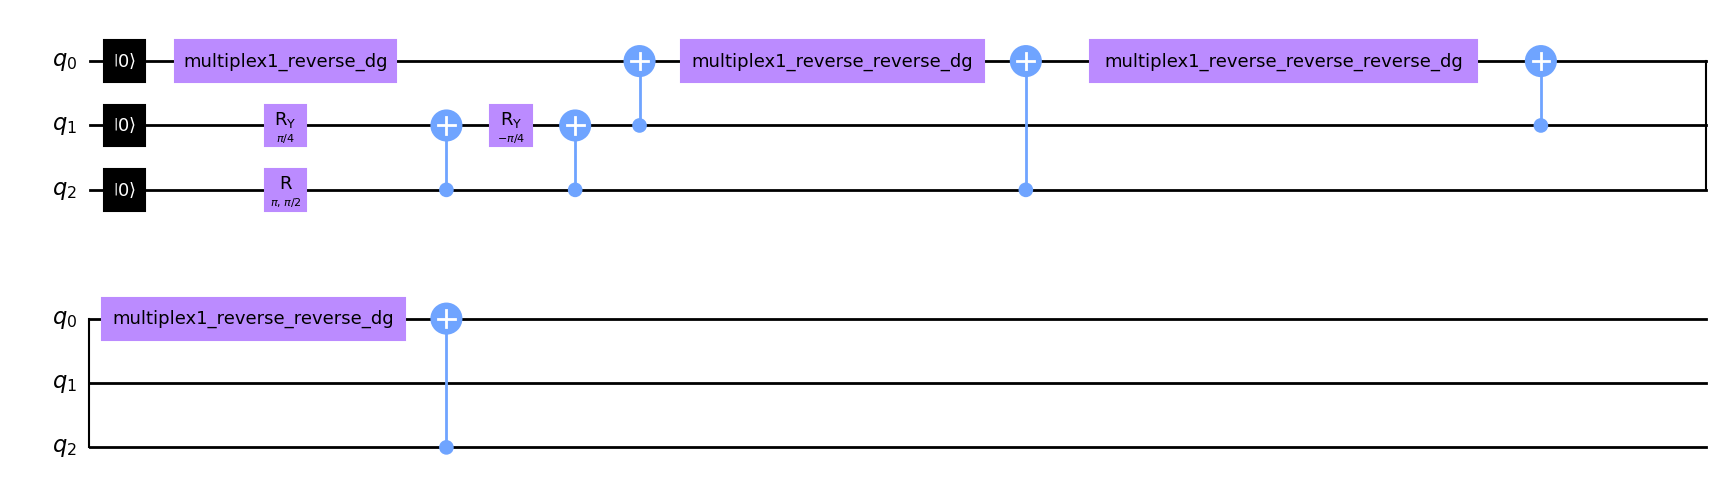

In [1]:
import math
from qiskit import QuantumCircuit

desired_state = [
    0,
    0,
    0,
    0,
    0,
    1 / math.sqrt(2),
    0,
    1 / math.sqrt(2)]

qc = QuantumCircuit(3)
qc.initialize(desired_state, [0,1,2])
qc.decompose().decompose().decompose().decompose().decompose().draw()

While simple to understand, it is complex to implement.

### Amplitude encoding

Amplitude encoding requires encoding data into the amplitudes of a quantum state.

$\ket{\psi_x} = \displaystyle\sum_{i=1}^N x_i\ket{i}$

where $N = 2^n$, $x_i$ is the ith element of x, and $\ket{i}$ is the ith computational basis state. To encode the entire dataset, all M N-dimensional datapoints are concatenated into one amplitude vector of length N x M and total set of values are normalized. Thus, we have:

$\ket{X} = \displaystyle\sum_{i=0}^N \alpha_i \ket{i}$

where $\alpha_i$ are the elements of the amplitude vector. The number of amplitudes being encoded is N x M but because we have a system of n qubits providing $2^n$ amplitudes, we require $n \ge log_2(NM)$ qubits. Additional, leftover amplitudes can be padded with constants.

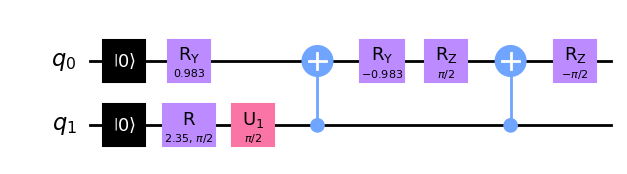

In [2]:
desired_state = [
    1 / math.sqrt(15.25) * 1.5,
    0,
    1 / math.sqrt(15.25) * -2,
    1 / math.sqrt(15.25) * 3]

qc = QuantumCircuit(2)
qc.initialize(desired_state, [0,1])

qc.decompose().decompose().decompose().decompose().decompose().draw()

This requires only $log_2(NM)$ qubits but algorithms must operate on amplitudes of the quantum state and methods to prepare and measure those states tend to not be efficient.

### Angle encoding

Angle encoding encodes N features into the rotation angles of n qubits where $N \le n$. It does this by encoding $x_i$ as the $\theta$ on the bloch sphere for a qubit in superposition of $\ket{0}$ and $\ket{1}$. Thus, the whole datapoint (having N features) gets encoded in N qubits. This is different than the last 2 methods since it only encodes a single datapoint and not the entire dataset.

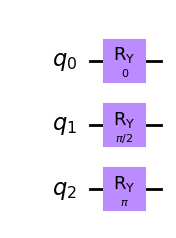

In [3]:
qc = QuantumCircuit(3)
qc.ry(0, 0)
qc.ry(2*math.pi/4, 1)
qc.ry(2*math.pi/2, 2)
qc.draw()

Dense angle encoding encodes 2 features per qubit using the relative phase so it encodes one feature of a datapoint as $\theta$ and another as $\phi$.

### Arbitrary encoding

Arbitrary encoding encodes N features as rotations on N parameterized gates on n qubits. Like angle encoding, it only encodes one datapoint at a time. For example, we can encode 12 features using only 3 qubits by rotating about y and z, then entangling, then rotating again by y and z.

Below, we have encoded the following datapoint: x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2].

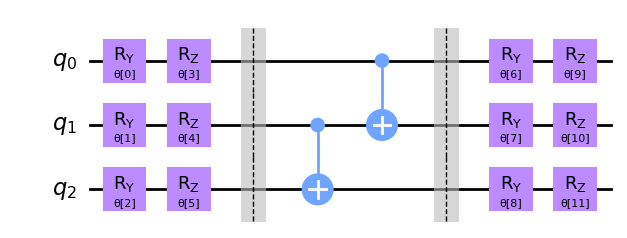

In [4]:
from qiskit.circuit.library import EfficientSU2
circuit = EfficientSU2(num_qubits=3, reps=1, insert_barriers=True)
circuit.decompose().draw()

The ZZFeatureMap can be used to encode 3 features with 3 qubits despite having 6 parameterized gates.

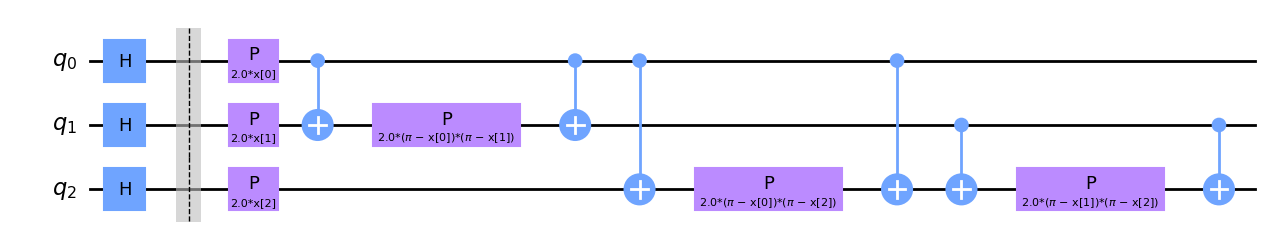

In [5]:
from qiskit.circuit.library import ZZFeatureMap
circuit = ZZFeatureMap(3, reps=1, insert_barriers=True)
circuit.decompose().draw()

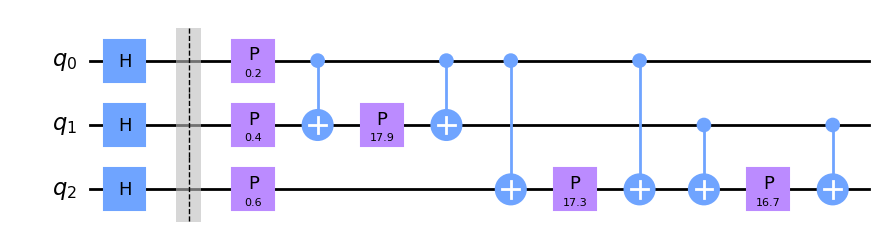

In [6]:
x = [0.1, 0.2, 0.3]
encode = circuit.bind_parameters(x)
encode.decompose().draw()